## Case Study on ANOVA
    XYZ Company has offices in four different zones. The company wishes to investigate the following :
    Dataset provided:-Sales_data_zone_wise.csv
    
     ● The mean sales generated by each zone.
     ● Total sales generated by all the zones for each month.
     ● Check whether all the zones generate the same amount of sales.
    Help the company to carry out their study with the help of data provided.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [48]:
data = pd.read_csv("Sales_data_zone_wise.csv")## LOADING THE DATASET.

## Data analysis

In [8]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [9]:
data.shape

(29, 5)

data.isnull().sum()## CHECKING FOR NULL VALUES.

## INFERENCE:
    1. The dataset contains 29 entries, representing sales of different zones per month.
    2. Also it has 5 Features , one with datatype object and the others with integer 64 bit.
    3. There is no null value present in the dataset.

## 1. The mean sales generated by each zone.


In [13]:
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [14]:
data.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

Text(0.5, 1.0, 'SALES DATA ZONE-WISE')

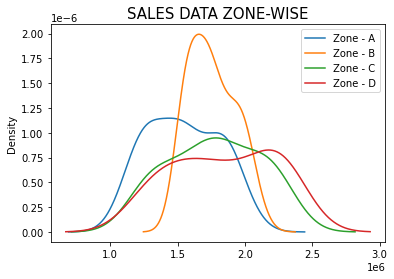

In [33]:
data[['Zone - A','Zone - B','Zone - C','Zone - D']].plot.kde()
plt.title('SALES DATA ZONE-WISE',fontsize=15)

## INFERENCE:
    1. Zone -D has the highest sales and Zone-A the least compared with the others.
    2 Maximum sales amount is in the order of Zone-D> Zone-C> Zone-B> Zone-A.

## 2.Total sales generated by all the zones for each month.


In [15]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [26]:
Total_Sales_Per_Month=data['Zone - A']+data['Zone - B']+data['Zone - C']+data['Zone - D']
data["Total_Sales_Per_Month"]=Total_Sales_Per_Month


In [30]:
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Sales_Per_Month
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


In [31]:
data["Total_Sales_Per_Month"].mean()

6911850.517241379

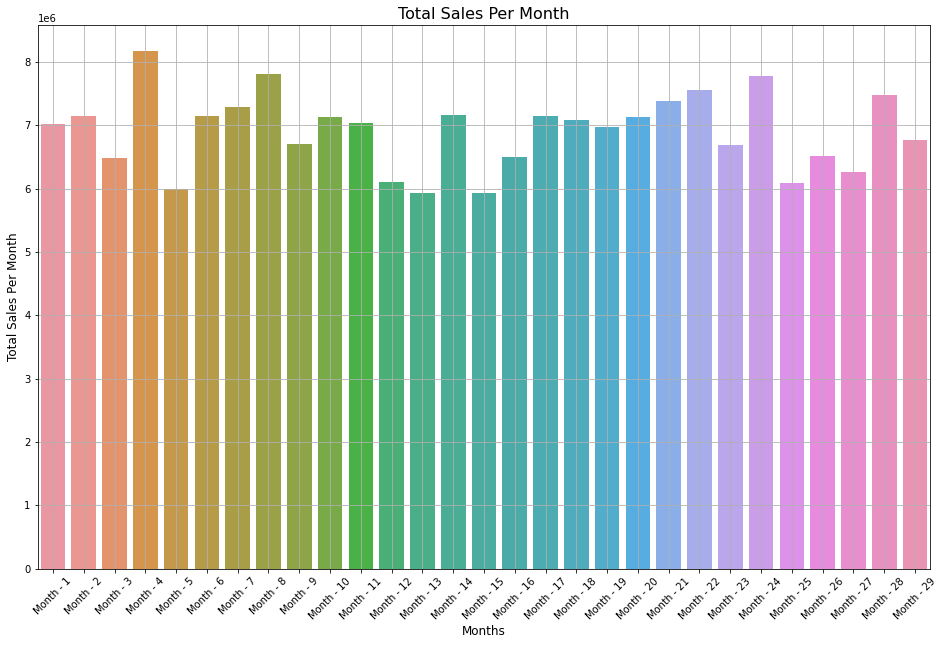

In [35]:
plt.figure(figsize=(16,10))
sns.barplot(data =data ,x = "Month", y = "Total_Sales_Per_Month")
plt.title("Total Sales Per Month", fontsize = 16)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Total Sales Per Month", fontsize = 12)
plt.xticks(rotation = 45)
plt.grid()

## INFERENCE:
    1. Comparing within the months, Month-4 has highest total sales and Month-13 has the lowest.
    2. The mean total sale for all the months combined is 6911850.517

## 3. Check whether all the zones generate the same amount of sales.

 Here we are doing **ONEWAY ANOVA** Hypotheis test.
 
   **Null Hypothesis, H0:** All zones generate same amount of sales.
   
   **Alternate Hypothesis, Ha:** All zones generate different amount of sales.
   >Level of Significance, alpha value=0.05

In [36]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Sales_Per_Month
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328


In [47]:
svalue, pvalue = f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'],data['Zone - D'])
print(f"The F-statistic value is: %0.3f"%svalue)
print(f"The Calculated p value is: %0.3f"%pvalue)

The F-statistic value is: 5.672
The Calculated p value is: 0.001


## INFERENCE:
    Since the p value is less than significant value(0.05) , we can reject NULL HYPOTHESIS and supports the other.
    Hence, each zone generate diffeerent amount of sales per month.

### KARUNNIA MENON M, DSA NORKA BATCH-3